<a href="https://colab.research.google.com/github/RaphaelBau/Simulaci-n-/blob/main/MC_acierto_y_error.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Metodo de Monte Carlo acierto y error


**PASO 1**. Genere una secuencia $\{U_j\}_{j=1}^{2N}$ de $2N$ números aleatorios.

In [1]:
from random import random

"""
  Esta funcion genera un par de numeros aleatorios con distribucion uniforme
  con a=0 y b=1
"""
def uniforme():
  return (random(),random())

# Pequeña prueba del codigo

for i in range(10):
  print(uniforme())


(0.668654991236803, 0.4114068565923683)
(0.21553861847931344, 0.8426310892071792)
(0.601697852165025, 0.34516796259083005)
(0.055948654909640516, 0.4366352967682472)
(0.7212145161029065, 0.871392717721819)
(0.9103862704213355, 0.3177078437701194)
(0.13592445856435242, 0.04740372020458694)
(0.7875961277516386, 0.8379812373720599)
(0.07978340716567611, 0.24203846998547607)
(0.8778524553754218, 0.4399224599371898)


**PASO 2**. Organice los números aleatorios en $N$ pares $(U_1,U_1^´),(U_2,U_2^´),...,(U_N,U_N^´)$ de cualquier forma tal que cada número aleatorio $U_j$ se use exactamente una vez.

In [ ]:
N = 5 #por ejemplo

def lista(n):
  l = []
  for n in range(n):
    l.append(uniforme())
  return l

print(lista(N))

[(0.03229396177370758, 0.6159661864984769), (0.07502807883035334, 0.15966375888028594), (0.4764136163302014, 0.8904559087302765), (0.8202304655965117, 0.2652627256884761), (0.3612071457517312, 0.9620985495682173)]


**PASO 3**. Calcule $X_i=a+U_i(b-a)\hspace{0.5cm}$ y $\hspace{0.5cm}g(X_i) , \hspace{0.5cm}i=1,2,...,N$

In [ ]:
X = lambda a,b,u: a+u[0]*(b-a)

a = 0
b = 1

v = lista(N)

# pequeña prueba del codigo
for j in v:
  print(X(a,b,j))


0.008437974953767524
0.00860241202319667
0.014738186677825338
0.8190155369654835
0.9388117366640089


A modo de ejemplo se va a utilizar la función $g(x)=-x^2+x$

In [ ]:
import numpy as np

g = np.poly1d([-1,1,0])

for j in lista(N):
  print(X(a,b,j),g(X(a,b,j)))


0.6428028407782969 0.2296073486656484
0.7068613458395969 0.20720838359743068
0.7113401599356974 0.20533533679835383
0.7844746117982029 0.16907419524226178
0.1755434293264877 0.1447279337467841


Grafica de la función

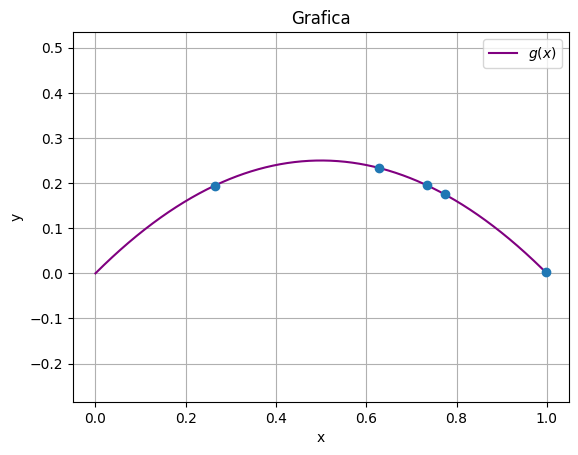

In [ ]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots()

x = []
for i in lista(N):
  x.append(i[0])

y = list(map(g ,x))

x1 = np.arange(a,b,0.001)

plt.title('Grafica')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x1,g(x1),color="purple",label="$g(x)$")
plt.plot(x,y,"o")
plt.legend(loc='upper right')
plt.axis('equal')
plt.grid()
plt.show()

**PASO 4**. Cuente el número de casos $N_H$ para los cuales $g(X_i)>cU_i^{'}$

In [ ]:
c = 5

def NH(a,b,f,l):
  n = 0
  for i in l:
    if f(X(a,b,i))>c*i[1]:
      n+=1
  return n
print(NH(a,b,g,lista(N)))

0


**PASO 5**. Estime la integral $I$ por $\theta_1=c(b-a)\dfrac{N_H}{N}$

In [ ]:
def I(a,b,c,n,f):
  n2=0
  for i in lista(n):
    if f(X(a,b,i))>c*i[1]:
      n2+=1
  return c*(b-a)*(n2/n)

print(I(a,b,c,N,g))

0.0


Use el método de Acierto y Error para estimar las integrales:

$$(a) \int_{0}^{1}e^{e^x}dx$$
$$(b) \int_0^1\sqrt{(1-x^2)^3}dx$$

Para la primer integral se tiene el siguiente resultado si $a=0,b=1,c=100$ y $N=500000$

In [ ]:
from math import exp

def I(a,b,c,n,f):
  n2=0
  for i in lista(n):
    if f(X(a,b,i))>c*i[1]:
      n2+=1
  return c*(b-a)*(n2/n)

g1 = lambda x: exp(exp(x)) # funcion del inciso (a)

print("I = {0}".format(I(0,1,100,500000,g1)))

I = 6.371200000000001


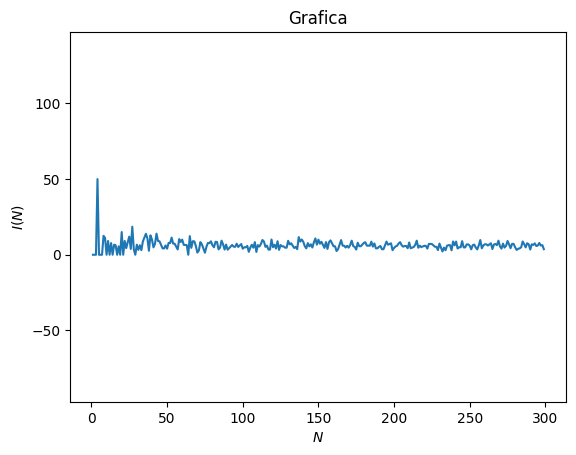

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig,ax=plt.subplots()

x = np.arange(1,300,1)
y = []
for i in range(len(x)):
  y.append(I(0,1,100,x[i],g1))

plt.title('Grafica')
plt.xlabel('$N$')
plt.ylabel('$I(N)$')
plt.plot(x,y)
plt.axis('equal')
plt.show()

Para la segunda integral se tiene el siguinete resultado si $a=0,b=1,c=100$ y $N=500000$

In [ ]:
from math import sqrt

def I(a,b,c,n,f):
  n2=0
  for i in lista(n):
    if f(X(a,b,i))>c*i[1]:
      n2+=1
  return c*(b-a)*(n2/n)

g2 = lambda x: sqrt((1-x**2)**3) # funcion del inciso (b)

print("I = {0}".format(I(0,1,100,500000,g2)))

I = 0.5760000000000001
